# Problems with Linear Regression


## Outliers

Consider the discussed data in the previous lecture.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

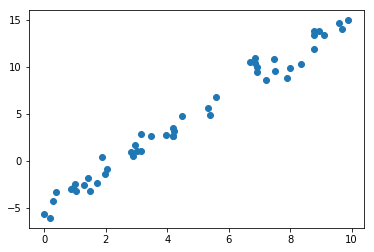

In [2]:
rng = np.random.RandomState(1)
x1 = 10 * rng.rand(50)
y1 = 2 * x1 - 5 + rng.randn(50)
plt.scatter(x1, y1);

model coeff: 2.02720881036
model intercept: -4.99857708555


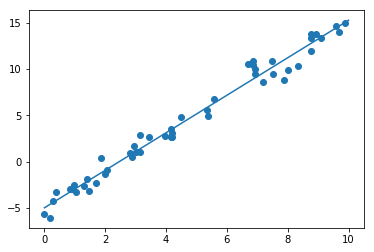

In [3]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression(fit_intercept=True)

model1.fit(x1[:, np.newaxis], y1)

xfit1 = np.linspace(0, 10, 1000)
yfit1 = model1.predict(xfit1[:, np.newaxis])
print "model coeff:", model1.coef_[0]
print "model intercept:", model1.intercept_

plt.scatter(x1, y1)
plt.plot(xfit1, yfit1);

In [4]:
print("Model slope:    ", model1.coef_[0])
print("Model intercept:", model1.intercept_)

('Model slope:    ', 2.0272088103606953)
('Model intercept:', -4.9985770855532037)


The coefficient values:

>``model coeff: 2.02720881036``

>``model intercept: -4.99857708555``

Now let's add an outlier. 

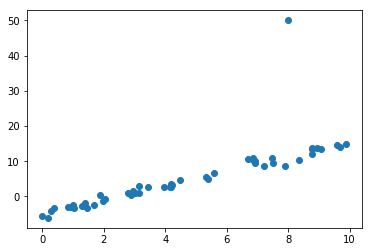

In [5]:
rng = np.random.RandomState(1)
x3 = 10 * rng.rand(50)
y3 = 2 * x3 - 5 + rng.randn(50)
y3[20] = 50
plt.scatter(x3, y3);

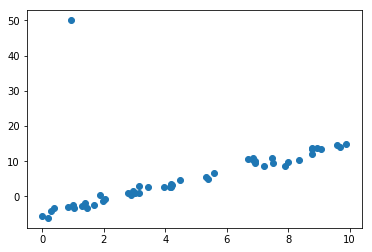

In [6]:
rng = np.random.RandomState(1)
x4 = 10 * rng.rand(50)
y4 = 2 * x4 - 5 + rng.randn(50)
y4[5] = 50
plt.scatter(x4, y4);

In [7]:
model3 = LinearRegression(fit_intercept=True)
model3.fit(x3[:, np.newaxis], y3)

xfit3 = np.linspace(0, 10, 1000)
yfit3 = model3.predict(xfit3[:, np.newaxis])
print "model coeff:", model3.coef_[0]
print "model intercept:", model3.intercept_

model coeff: 2.31463440241
model intercept: -5.53823193102


In [8]:
model4 = LinearRegression(fit_intercept=True)
model4.fit(x4[:, np.newaxis], y4)

xfit4 = np.linspace(0, 10, 1000)
yfit4 = model4.predict(xfit4[:, np.newaxis])
print "model coeff:", model4.coef_[0]
print "model intercept:", model4.intercept_

model coeff: 1.60175074269
model intercept: -1.95341547471


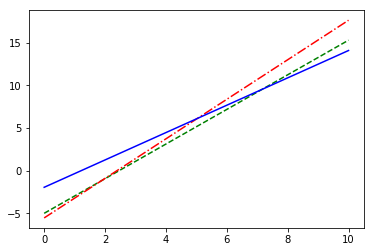

In [9]:
# plt.scatter(x3, y3)
# plt.scatter(x1, y1)
# plt.scatter(x4, y4)

plt.plot(xfit1, yfit1, "g--");
plt.plot(xfit3, yfit3, "r-.");
plt.plot(xfit4, yfit4, "b-");

* **A single outlier can significantly change the model parameters.**

## Linear separability

Consider follwing data.

* Here, data is generated by adding noise to a `sin` function.
* It is evident that a linear model will not be able to fit the datapoints properly.

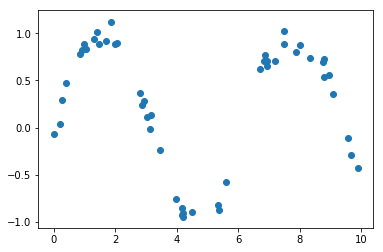

In [10]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

plt.scatter(x, y);

model coeff: -0.0120382789697
model intercept: 0.347945762962


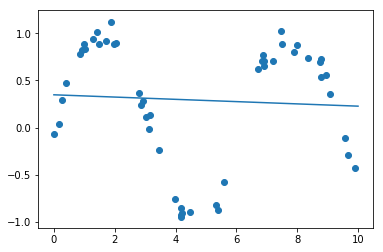

In [11]:
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
print "model coeff:", model.coef_[0]
print "model intercept:", model.intercept_

plt.scatter(x, y)
plt.plot(xfit, yfit);

## Ploynomial Bases Function with sklearn

Polynomial projection is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [12]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

Let's make a 7th-degree polynomial model for the non-linear data we saw earlier

In [13]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

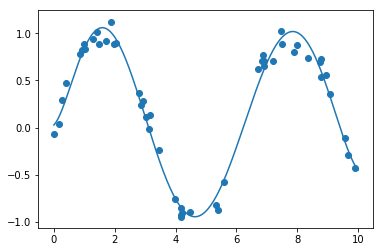

In [14]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

7th-order polynomial basis function can provide an excellent fit to this non-linear data

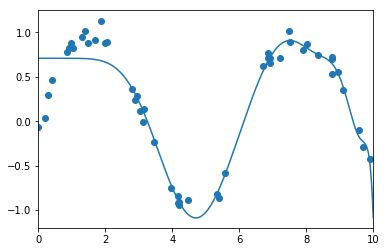

In [15]:
higher_polynomial = make_pipeline(PolynomialFeatures(18),
                            LinearRegression())
higher_polynomial.fit(x[:, np.newaxis], y)
yfit = higher_polynomial.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

# Regularization

* Although, the basis functions makes the model much more flexible, they leads to over-fitting.
* For example, if we choose too many Gaussian basis functions, we end up with results that don't look so good:

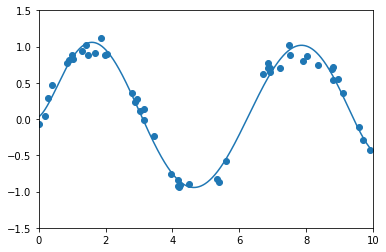

In [16]:
model = make_pipeline(PolynomialFeatures(7),LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

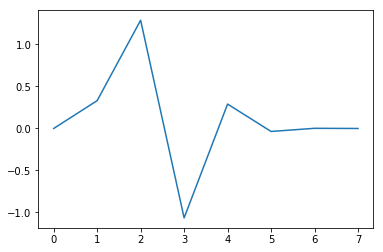

In [17]:
coef = model.steps[1][1].coef_
plt.plot(range(len(coef)), coef);

## Increasing model complexity with higher power polynomials

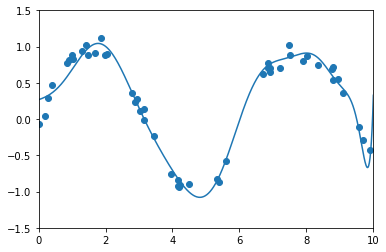

In [18]:
model = make_pipeline(PolynomialFeatures(16), LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

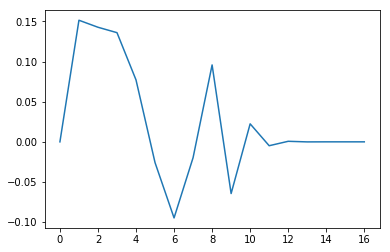

In [19]:
coef = model.steps[1][1].coef_
plt.plot(range(len(coef)), coef);

## L1 Regularization

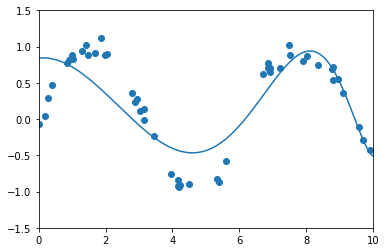

In [70]:
from sklearn.linear_model import Lasso
model = make_pipeline(PolynomialFeatures(15), Lasso(alpha=0.01))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

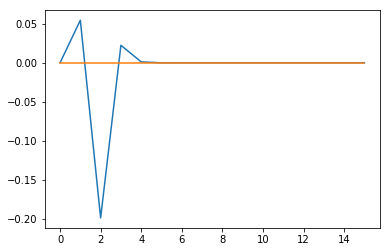

In [71]:
coef = model.steps[1][1].coef_
plt.plot(range(len(coef)), coef);
plt.plot(range(len(coef)), [0]*len(coef));

## Closer Look

(-5e-07, 5e-07)

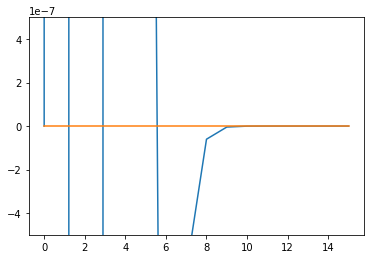

In [72]:
coef = model.steps[1][1].coef_
plt.plot(range(len(coef)), coef);
plt.plot(range(len(coef)), [0]*len(coef));
plt.ylim(-5e-7, 5e-7)

## Ridge regression ($L_2$ Regularization)


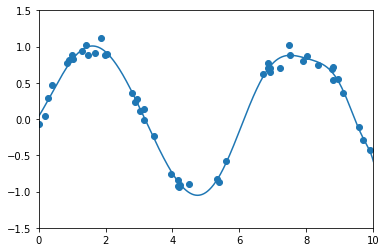

In [73]:
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(16), Ridge(alpha=0.1))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

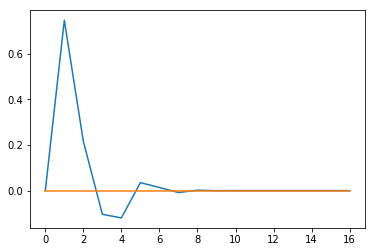

In [74]:
coef = model.steps[1][1].coef_
plt.plot(range(len(coef)), coef);
plt.plot(range(len(coef)), [0]*len(coef));

## Closer Look

(-5e-07, 5e-07)

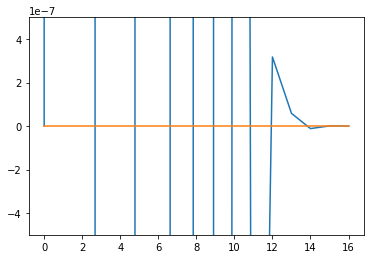

In [75]:
coef = model.steps[1][1].coef_
plt.plot(range(len(coef)), coef);
plt.plot(range(len(coef)), [0]*len(coef));
plt.ylim(-5e-7, 5e-7)

## L1 + L2: The Elastic Net

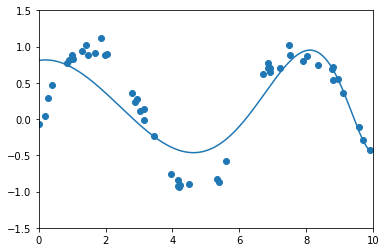

In [82]:
from sklearn.linear_model import ElasticNet
model = make_pipeline(PolynomialFeatures(16), ElasticNet(alpha=1e-7))
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

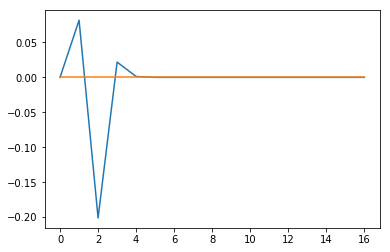

In [83]:
coef = model.steps[1][1].coef_
plt.plot(range(len(coef)), coef);
plt.plot(range(len(coef)), [0]*len(coef));

# Model Validation:

## Validation through Holdout Set

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

boston = load_boston()
X = boston.data
y = boston.target

In [10]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [2]:
model = Lasso(alpha=0.1)

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
mean_squared_error(y2, y2_model)

26.265940623175954

## Model validation via cross-validation

In [3]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
mean_squared_error(y1, y1_model), mean_squared_error(y2, y2_model)

(23.790083393814228, 26.265940623175954)

## Notes

* MSE scores could be combined (by, say, taking the mean) to get a better measure of the global model performance.
* This particular form of cross-validation is a *two-fold cross-validation*

## Model validation through k-fold validation

In [8]:
## Model validation through k-fold validationfrom sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
scores.mean()

-34.899204279559065

## Model validation using Leave-one-out validation

In [6]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=LeaveOneOut(len(X)))
print "mean score:", scores.mean()
print "shape:", scores.shape[0]

mean score: -24.9131197839
shape: 506
